The purpose of this notebook is to open and plot the files from our FPLC run

In [1]:
file1 = 'FPLC_Versuch1.asc'
file2 = 'FPLC_Versuch2.asc'

In [2]:
class ASC:
    def __init__(self, filename):
        self.filename = filename
        self.measurings = []
        self.fractions = {}
        
        with open(self.filename, 'r') as f:
            f.readline()
            f.readline()
            f.readline()
            for line in f:
                line = line.replace(',', '.')
                line = line.strip() # Remove trailling whitespace
                if len(line) == 0:
                    break
                
                line = line.split('\t')
                ml = float(line[0])
                UV = float(line[1])
                if len(line) > 2:
                    Cond = float(line[3])
                else:
                    Cond = 0
                if len(line) > 4:
                    Press = float(line[5])
                else:
                    Press = 0
                if len(line) > 7:
                    fraction = int(line[7].replace('"', ''))
                    fr_ml = float(line[6])
                    self.fractions[fraction] = fr_ml
                    
                self.measurings.append([ml, UV, Cond, Press])

In [3]:
asc1 = ASC(file1)
asc2 = ASC(file2)

In [4]:
import matplotlib.pyplot as plt
% matplotlib inline

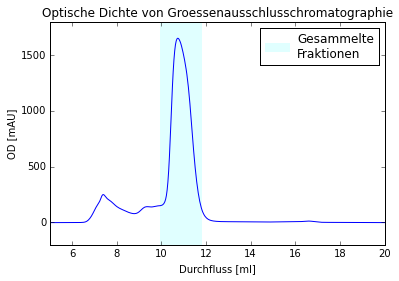

In [26]:
plt.plot([a[0] for a in asc1.measurings], [a[1] for a in asc1.measurings], 'b')
plt.title('Optische Dichte von Groessenausschlusschromatographie', fontsize=12)
plt.ylabel('OD [mAU]')
plt.xlabel('Durchfluss [ml]')
plt.xlim([5, 20])
plt.ylim([-200, 1800])
plt.axvspan(asc1.fractions[5], asc1.fractions[9], color='lightcyan', label='Gesammelte\nFraktionen')
plt.legend()
plt.savefig('V1_FPLC.png')

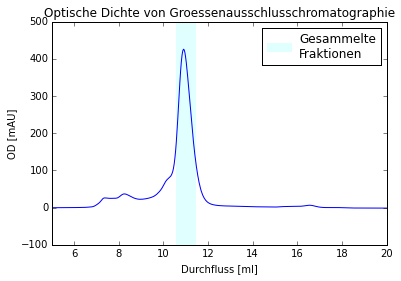

In [27]:
plt.plot([a[0] for a in asc2.measurings], [a[1] for a in asc2.measurings], 'b')
plt.title('Optische Dichte von Groessenausschlusschromatographie', fontsize=12)
plt.ylabel('OD [mAU]')
plt.xlabel('Durchfluss [ml]')
plt.xlim([5, 20])
plt.ylim([-100, 500])
plt.axvspan(asc2.fractions[3], asc2.fractions[5], color='lightcyan', label='Gesammelte\nFraktionen')
plt.legend()
plt.savefig('V2_FPLC.png')